In [ ]:
#initial_libraries
import pandas as pd
import numpy as np
from numpy import nan as NA
import random
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from math import radians, sin, cos, asin, sqrt
import folium

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Daft/cleaned_data.csv')
df_text = df[['id','description']]
df_text = df_text.dropna()

In [ ]:
#Tokenization, removing stopwords and stemming or lemmatization
def prep_text(text, use_stemming=True):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    if use_stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [ ]:
df_text['prep_description_stemm'] = df_text['description'].apply(lambda x: prep_text(x, use_stemming=True))  # or use_stemming=False
df_text['prep_description_lemm'] = df_text['description'].apply(lambda x: prep_text(x, use_stemming=False))

In [ ]:
df_text

,id,description,prep_description_stemm,prep_description_lemm
0,5500509,Development Experience a better kind of rentin...,develop experi better kind rent quaysid quarte...,development experience better kind renting qua...
1,5583033,Development www.nicheliving.com\r\n\r\nRents i...,develop rent incl broadband util bill tv gym c...,development rent incl broadband utility bill t...
2,5419793,Development www.nicheliving.com\r\n\r\nRents f...,develop rent incl broadband util bill tv gym c...,development rent incl broadband utility bill t...
3,5185412,Development Our community is connected by priv...,develop commun connect privat garden children ...,development community connected private garden...
4,5601119,Development Balroy Hall offers an exclusive se...,develop balroy hall offer exclus select apart ...,development balroy hall offer exclusive select...
...,...,...,...,...
10934,5870975_A,Sale Type: For Sale by Private TreatyOverall F...,sale type sale privat treatyoveral floor area ...,sale type sale private treatyoverall floor are...
10935,5781883_A,Central St Stephens Green location. \nPrice is...,central st stephen green locat price includ bi...,central st stephen green location price includ...
10936,5552980_A,Overall Floor Area: 44 m²1st floor return offi...,overal floor area floor return offic avail fle...,overall floor area floor return office availab...
10937,5840048_A,Sale Type: For Sale by Private TreatyOverall F...,sale type sale privat treatyoveral floor area ...,sale type sale private treatyoverall floor are...


In [ ]:
#vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#To convert texts into a vector representation
tfidf_matrix1 = vectorizer.fit_transform(df_text['prep_description_stemm'])
tfidf_matrix2 = vectorizer.fit_transform(df_text['prep_description_lemm'])

In [ ]:
# to reduce the dimensionality of the TF-IDF matrix
svd = TruncatedSVD(n_components=100)
tfidf_matrix_reduced1 = svd.fit_transform(tfidf_matrix1)
tfidf_matrix_reduced2 = svd.fit_transform(tfidf_matrix2)

In [ ]:
def find_similar_descr(query, tfidf_matrix_reduced, vectorizer, use_stemm,threshold=0.2):
    query1 = prep_text(query, use_stemming=use_stemm)
    query_tfidf = vectorizer.transform([query1])
    query_reduced = svd.transform(query_tfidf)
    cosine_similarities = cosine_similarity(query_reduced, tfidf_matrix_reduced) #Calculating the similarity between the request and the descriptions
    similar_descr = cosine_similarities.argsort()[0][::-1] # to get indexes
    #similar_descr_above_threshold = [idx for idx in similar_descr if cosine_similarities[0][idx] > threshold]
    return similar_descr, cosine_similarities

In [ ]:
query = "Want to rent 3 bedroom house"

In [ ]:
similar_descr1, similarities1 = find_similar_descr(query, tfidf_matrix_reduced1, vectorizer,True)
for idx in similar_descr1[:3]:
    print(f"{df_text.iloc[idx]} - the similarity: {similarities1[0][idx]:.2f}")
print('------------------------------------')
similar_descr2, similarities2 = find_similar_descr(query, tfidf_matrix_reduced2, vectorizer,True)
for idx in similar_descr2[:3]:
    print(f"{df_text.iloc[idx]} - the similarity: {similarities2[0][idx]:.2f}")

id                                                                  5934111
description               Refurbished attic room with en suite now avail...
prep_description_stemm    refurbish attic room en suit avail rent well i...
prep_description_lemm     refurbished attic room en suite available rent...
Name: 10452, dtype: object - the similarity: 0.56
id                                                                  5929886
description               Newly Renovated Share House in Cabra – \n\nLoo...
prep_description_stemm    newli renov share hous cabra look femal share ...
prep_description_lemm     newly renovated share house cabra looking fema...
Name: 10328, dtype: object - the similarity: 0.56
id                                                                  5908123
description               Double bedroom in new build house available in...
prep_description_stemm    doubl bedroom new build hous avail hallwel gre...
prep_description_lemm     double bedroom new build house availab

## Vizualization

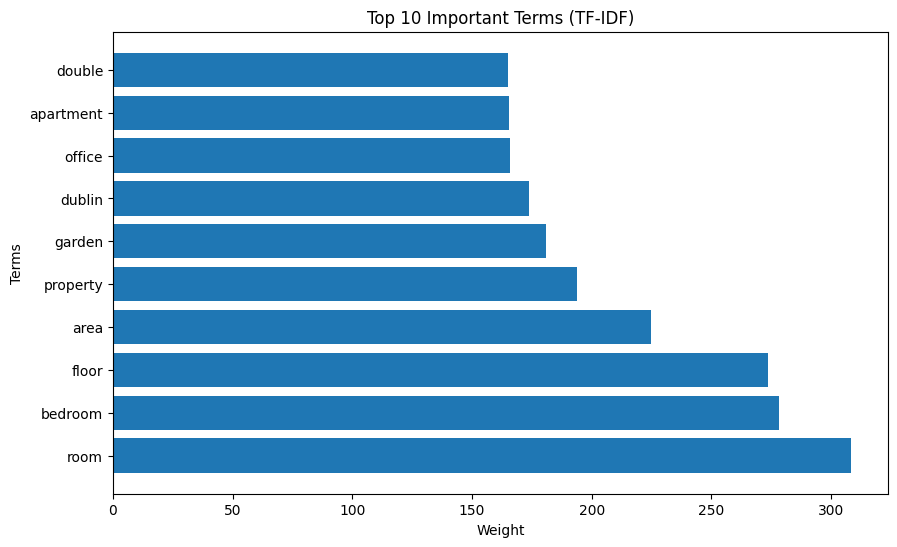

In [ ]:
#the most important words or phrases for similarity calculations
terms = vectorizer.get_feature_names_out()
weights = tfidf_matrix2.sum(axis=0).A1
terms_weights = sorted(zip(terms, weights), key=lambda x: x[1], reverse=True)[:10]
top_terms, top_weights = zip(*terms_weights)
plt.figure(figsize=(10, 6))
plt.barh(top_terms, top_weights)
plt.xlabel('Weight')
plt.ylabel('Terms')
plt.title('Top 10 Important Terms (TF-IDF)')
plt.show()